In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

# Domain Background

<div style="text-align: justify"> In today's world, marketing is an indispensable component of each and every industry. Marketing particularly assists businesses to increase their brand awareness in the consumer market, which eventually will help them to boost their chances of growth. According to <a href="https://deloitte.wsj.com/articles/who-has-the-biggest-marketing-budgets-1485234137">Wall Street Journal</a>, companies are allocating as high as 24% of their budget towards marketing every year, with an average of 11%. While allocations within the marketing budget can vary from company to company, it generally includes advertisement and discounts. With such a significant amount of budget being spent on marketing, companies are seeking intelligent ways to spend their money optimally. Many companies nowadays have analytics departments that advise them on identifying potential areas to target. The is where Machine Learning, and Data Science in general, starts to play a crucial role. There are various studies exploring the application of machine learning in marketing optimizations [<a href="https://www.zora.uzh.ch/id/eprint/197751/">1</a>], [<a href="https://books.google.com/books?hl=en&lr=&id=o_YtDwAAQBAJ&oi=fnd&pg=PR12&dq=marketing+optimization+machine+learning&ots=g81vbAw2gu&sig=KNG4Uj6LcZYpJxZiQHBYwCSEVnY#v=onepage&q=marketing%20optimization%20machine%20learning&f=false">2</a>], [<a href="https://www.researchgate.net/profile/Sushant-Vishnoi/publication/334626027_ARTIFICIAL_INTELLIGENCE_ENABLED_MARKETING_SOLUTIONS_A_REVIEW_SUSHANT_KUMAR_VISHNOI_TEENA_BAGGA_AARUSHI_SHARMA_AND_SAADAT_NASIR_WANI/links/5d36cc114585153e5919818f/ARTIFICIAL-INTELLIGENCE-ENABLED-MARKETING-SOLUTIONS-A-REVIEW-SUSHANT-KUMAR-VISHNOI-TEENA-BAGGA-AARUSHI-SHARMA-AND-SAADAT-NASIR-WANI.pdf">3</a>]. Machine Learning methods have enabled companies to intelligently decide on how and whom to target with their marketing activities to improve their revenue. Take offering discounts as an example. Companies use discount offers as incentives to persuade potential customers to purchase their product(s). For obvious reasons, they cannot offer discounts to all of their potential customers as it will adversely affect the revenue. Instead, they will offer it only to a proportion of the market. Deciding on whom to offer the discount to is a subject that data scientists and machine learning engineers have investigated thoroughly in recent years [<a href="http://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.441.5361&rep=rep1&type=pdf">4</a>], [<a href="http://yadda.icm.edu.pl/baztech/element/bwmeta1.element.baztech-article-BATA-0016-0005">5</a>], [<a href="https://dl.acm.org/doi/abs/10.1145/3383313.3412215">6</a>], identifying customer segmentations who will react favorably to marketing interventions and incentives.
    </div>

# Problem Statement

<div style="text-align: justify"> In the Starbucks Capstone Challenge of Udacity's Machine Learning Engineer Nanodegree, we are given a number of simulated datasets which emulate customer behavior on the Starbucks rewards mobile app. This app is mainly used for sending either informational messages or promotional offers. A customer might be targeted by (1) informational advertisement, (2) discount offer, or (3) buy one get one free (BOGO) offer. The data provided includes the attributes of all offers available, the demographics of each customer, and the features of each transaction made. While it is not possible to send all the offers to all customers, the goal of this project is to extract insights from the data provided and identify customer segmentation and particular offers that they react to better. Additionally, the aim is to design a new recommendation system which specifies which offer (if any) should be given to an individual customer. Exploratory data analysis and machine learning models can help us tackle these questions.
     </div>

# Datasets and Inputs

There are three datasets provided for this project. Each of these tables can help us understand how and in what way each offer is effective in persuading a customer:

* **portfolio.json** - containing offer ids and meta data about each offer (duration, type, etc.). Coming from three main families of promotions (informational, discount, BOGO), there are 10 unique promotions available in this table. There is no monetary incentive associated with informational advertisements. In the discounts offer, the customer will receive some discounts if they spend a particular amount. Lastly, in the BOGO offer, if a customer purchases a product, he/she will receive a free one as well.
* **profile.json** - demographic data for each customer. In this table, some of the values are missing which needs to be addressed before any modeling work.
* **transcript.json** - records for transactions, offers received, offers viewed, and offers completed.

The schema and explanation of each variable in the files are as following:

**portfolio.json**
* id (string) - offer id
* offer_type (string) - type of offer ie BOGO, discount, informational
* difficulty (int) - minimum required spend to complete an offer
* reward (int) - reward given for completing an offer
* duration (int) - time for offer to be open, in days
* channels (list of strings)

**profile.json**
* age (int) - age of the customer 
* became_member_on (int) - date when customer created an app account
* gender (str) - gender of the customer (note some entries contain 'O' for other rather than M or F)
* id (str) - customer id
* income (float) - customer's income

**transcript.json**
* event (str) - record description (ie transaction, offer received, offer viewed, etc.)
* person (str) - customer id
* time (int) - time in hours since start of test. The data begins at time t=0
* value - (dict of strings) - either an offer id or transaction amount depending on the record

<div style="text-align: justify">  
It is important to note that each offer has a validity period before the offer expires, and this includes informational offers. In this case, we will assume that if an informational offer has X days of validity, the customer is feeling the influence of the offer for X days after receiving the advertisement. Another characteristic of the data is that a customer may complete an offer without viewing it. For instance, if a customer receives a BOGO offer with a validity of 7 days, he/she will get a free product at the time of purchase during that week without even seeing the offer. In this case, the offer is completed, but the credit does not go to the offer.
</div>

# Solution Statement

In order to address the questions laid out in the problem statement, we will rely on three main approaches:
* Exploratory Data Analysis
* Predictive Modeling
* Uplift Modeling

<div style="text-align: justify"> <b>Exploratory Data Analysis</b>: This approach will help us to summarize the main characteristics pertinent to our data visually detect patterns in customer behavior and identify particular demographics who react favorably to the offers that the mobile app is providing. This will be our initial investigation towards the data to gather insights for the modeling work.</div>

<div style="text-align: justify"> <b> Predictive Modeling</b>: the initial hypothesis is that customer characteristics and offer attributes are associated with the likelihood of completing an offer and making a purchase. We will build a model (or a suite of models) to find these potential associations. It is worth noting that while this model can provide insights about the purchasing likelihood, it cannot be directly used as a recommendation model.</div>


<div style="text-align: justify"> <b> Uplift Modeling</b>: One of the goals of this project is to design a recommendation system which can assist the mobile app in intelligently sending offers to customers. The logic here is each offer acts as an intervention and an offer should be sent to a customer whose likelihood of purchasing <b>increases</b> if he/she receives the offer. For instance, let's assume customer A's likelihood of purchasing without any offer is 0.7, and if we send him an offer, it will increase to 0.8. On the other hand, customer B will buy our product with the probability of 0.3 and in case of receiving an offer, it will go up to 0.6. While the offer increases customer A's purchasing likelihood by 0.1, this difference for customer B is 0.3. It is evident that customer B is a better candidate to receive our offer. Interestingly, if were to only use a predictive model and utilize the scores to decide which customers to target, we would select customer A. This whole framework is called Uplift Modeling (also known as incremental modeling) which aims to find the <i>change</i> in the likelihood of an event. Uplift modeling is particularly useful in marketing campaigns, as it helps marketing teams to measure the effectiveness of their tactics and isolate their influence. The fundamental issue in uplift modeling is that we cannot measure the effect of an intervention on one individual customer, simply because a customer can either receive or not receive an offer. In this case, what we can do is estimate the uplift based on groups of similar customers. In particular, we classify all customers into four main groups:</div>

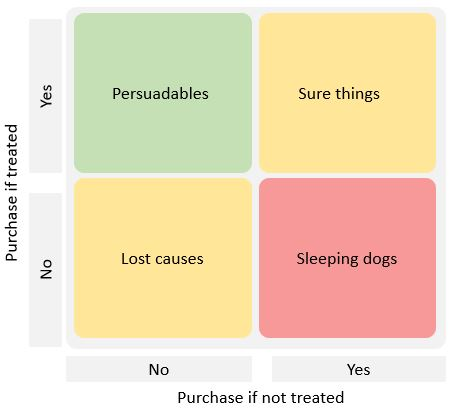

<div style="text-align: justify"> <i>Persuadables</i> are customers who we need to identify and target. These are customers who will purchase our product only if targeted by our treatment/offer. <i>Sure things</i> are will buy our product even if they do not receive any offer. <i>Lost causes</i> are customers are who are not going to purchase even if there are treated. These two groups have zero uplift. Treating these customers would be synonymous with wasting marketing money. The last group is called <i>sleeping dogs</i>. These are customers whose likelihood of purchasing will decrease if treated. It is important to identify these customers as well, since we do not want to lose customers with our marketing activities.</div>

<div style="text-align: justify"> There are three main approaches towards uplift modeling. (1) tree-based algorithms which model uplift directly [<a href="https://proceedings.mlr.press/v67/gutierrez17a/gutierrez17a.pdf">7</a>], [<a href="https://dspace.mit.edu/handle/1721.1/119250">8</a>], (2) meta-learners which model uplift indirectly [<a href="https://arxiv.org/abs/1706.09523">9</a>], [<a href="https://www.pnas.org/content/116/10/4156">10</a>], [<a href="https://arxiv.org/abs/1712.04912">11</a>] (3) and class variable transformation which makes uplift predictable by transforming the response variable [<a href="https://people.cs.pitt.edu/~milos/icml_clinicaldata_2012/Papers/Oral_Jaroszewitz_ICML_Clinical_2012.pdf">12</a>]. In this project, we will try one or two of these algorithms to see which one will provide more value in predicting uplift.</div>

# Benchmark Model

<div style="text-align: justify">
In this project, we will use the current strategy as the benchmark model. We aim to find a model and recommendation system which can provide more value compared to the existing strategy which is encapsulated in the data. Here, we can assume that the offers are sent to customers based on a particular strategy which have already indicated which customers will make a purchase after receiving an offer. We already know that this strategy is not perfect as the data tells us that the offers are also sent to customers who indeed did not purchase the product. Using this as a baseline, we aim to improve the potential customer targeting. </div>

# Evaluation Metrics

<div style="text-align: justify"> In the predictive modeling, we will build a classification model to estimate the likelihood of purchasing given the customers' and offers' attributes. We will assess the performance of this model using accuracy, precision, recall, and F1 score. Below, we show the definition of each metric:</div>

\begin{align}
Accuracy = \frac{TP+TN}{TP+FP+FN+TN}
\end{align}

\begin{align}
Precision = \frac{TP}{TP+FP}
\end{align}

\begin{align}
Recall = \frac{TP}{TP+FN}
\end{align}

\begin{align}
F1 \: Score = \frac{2*Recall*Precision}{Recall+Precision}
\end{align}

<div style="text-align: justify">
    
where TP is the number of True Positives, FP is for False Positives, TN stands for True Negatives, and FN is for False Negatives. </div>
<div style="text-align: justify">
In the uplift modeling, we usually use the predicted uplift scores to rank customers in descending order to find out how many extra customers we would attract, if we used the uplift model to send our offers. Here, we calculate a metric called cumulative gain:</div>
\begin{align}
(\frac{Y^T}{N^T}-\frac{Y^C}{N^C})(N^T+N^C),
\end{align}

<div style="text-align: justify">
where $C$ stands for control (the group of customers who have not received an offer) and $T$ stands for treatment (customers who received an offer/treatment. $Y$ is the number of customers who made a purchase in each bucket of uplift scores and $N$ is the total number of customers in each bucket. We will use this metric to evaluate the goodness of our uplift models.</div>

# Project Design

In order to fulfill the goals of this project, we will follow the steps below:
    
<div style="text-align: justify"> 1. <b>Data Preparation</b>: we will rely on <i>pandas</i> package to read the data and merge the tables to create a unified dataset. </div>
<div style="text-align: justify">2. <b>Exploratory Data Analysis</b>: here we use <i>matplotlib</i> and <i>seaborn</i> packages to extract visual insights from the data through various plotting methods.
<div style="text-align: justify">3. <b>Feature Engineering</b>: we will address missing values through imputation or dropping. We also investigate the possibility of engineering new features that can be used in the modeling stage.</div>
<div style="text-align: justify">4. <b>Predictive Modeling</b>: we will build one or two models to find the association of customer characteristics and offer attributes with the likelihood of making a purchase. We then evaluate the performance of these models using the aforementioned metrics.</div>
<div style="text-align: justify">5. <b>Uplift Modeling</b>: we will build one or two uplift models to design a recommendation system to identify the best offer for each customer given their features in order to increase their likelihood of buying the product. We will assess the performance of these models using cumulative gain plots.</div>
6. Conclusion: we will wrap up the project at this stage, summarizing the main findings and identifying areas for improvement.</div> 

# Exploratory Data Analysis (EDA)

<div style="text-align: justify"> In order to fulfill the goals of this project, we start we EDA, exploring the datasets provided. To do so, we created the <b>Processing</b> script which includes the classes and funstions that we need. We initiate the <b>DataPrep</b> class which reads all three tables, including portfolio, profile, and transcript. First, let's see how each table looks like.
    </div>

In [3]:
import pandas as pd
import numpy as np
import math
import json
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from pandas import DataFrame

import Processing

import warnings
warnings.simplefilter('always', category=UserWarning)
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
data_prep = Processing.DataPrep()

In [3]:
data_prep.profile.head()

,gender,age,id,became_member_on,income
0,None,118,68be06ca386d4c31939f3a4f0e3dd783,20170212,NaN
1,F,55,0610b486422d4921ae7d2bf64640c50b,20170715,112000.0
2,None,118,38fe809add3b4fcf9315a9694bb96ff5,20180712,NaN
3,F,75,78afa995795e4d85b5d9ceeca43f5fef,20170509,100000.0
4,None,118,a03223e636434f42ac4c3df47e8bac43,20170804,NaN


In [4]:
data_prep.portfolio.head()

,reward,channels,difficulty,duration,offer_type,id
0,10,"[email, mobile, social]",10,7,bogo,ae264e3637204a6fb9bb56bc8210ddfd
1,10,"[web, email, mobile, social]",10,5,bogo,4d5c57ea9a6940dd891ad53e9dbe8da0
2,0,"[web, email, mobile]",0,4,informational,3f207df678b143eea3cee63160fa8bed
3,5,"[web, email, mobile]",5,7,bogo,9b98b8c7a33c4b65b9aebfe6a799e6d9
4,5,"[web, email]",20,10,discount,0b1e1539f2cc45b7b9fa7c272da2e1d7


In [5]:
data_prep.transcript.head()

,person,event,value,time
0,78afa995795e4d85b5d9ceeca43f5fef,offer received,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'},0
1,a03223e636434f42ac4c3df47e8bac43,offer received,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'},0
2,e2127556f4f64592b11af22de27a7932,offer received,{'offer id': '2906b810c7d4411798c6938adc9daaa5'},0
3,8ec6ce2a7e7949b1bf142def7d0e0586,offer received,{'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'},0
4,68617ca6246f4fbc85e91a2a49552598,offer received,{'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'},0


<div style="text-align: justify"> We initiate the <b>DataPrep</b> class which reads all three tables, including portfolio, profile, and transcript. Next, we use the portfolio_prep function to prepare portfolio data for EDA. This function does the following: <br> <br>
&nbsp; (1) transform the channel column and create dummy variables upon, <br>
&nbsp; (2) rename some of the variables, <br>
&nbsp; (3) rename offer IDs for better readability The new format will be OfferType_Duration_Reward. <br> <br>
profile_prep function is design to prepare the profile data by executing the following: <br> <br>
&nbsp; (1) rename user IDs for better readability, <br>
&nbsp; (2) find the number of days of membership for each user, <br>
&nbsp; (3) find the year of membership, <br>    
&nbsp; (4) find the month of membership, <br>   
&nbsp; (5) replace age of 118 with NaN, <br>   
&nbsp; (6) replace None gender with NaN, <br>
&nbsp; (7) drop rows which have missing values for all user attributes. <br>   <br> 
transcript_prep function will manipulate the transcript table by running the steps below:<br>  <br>
&nbsp; (1) transform the value column and create new columns containing the offer ID and transaction amount if applicable, <br>
&nbsp; (2) rename events for better readability, <br>
&nbsp; (3) rename offer IDs for better readability, consistent with the portfolio table, <br>
&nbsp; (4) rename user IDs for better readability, consistent with profile table. <br>
    
Now that we have the portfolio data ready, we use the describe_portfolio function in the DataDescription class to explore various features of this table. Below, you can see the results of initiating this class and running the function.
    </div>

In [6]:
portfolio = data_prep.portfolio_prep()
portfolio.head()

,offer_id,offer_type,num_channels,duration,offer_reward,difficulty,channel_email,channel_mobile,channel_social,channel_web
0,bogo_5_10,bogo,4,5,10,10,1,1,1,1
1,bogo_5_5,bogo,4,5,5,5,1,1,1,1
2,bogo_7_10,bogo,3,7,10,10,1,1,1,0
3,bogo_7_5,bogo,3,7,5,5,1,1,0,1
4,discount_10_2,discount,4,10,2,10,1,1,1,1


In [7]:
profile = data_prep.profile_prep()
profile.head()

,gender,age,person,became_member_on,income,membership_days,membership_month,membership_year
0,F,55.0,user_2,2017-07-15,112000.0,1606,7,2017
1,F,75.0,user_4,2017-05-09,100000.0,1673,5,2017
2,M,68.0,user_6,2018-04-26,70000.0,1321,4,2018
3,M,65.0,user_9,2018-02-09,53000.0,1397,2,2018
4,M,58.0,user_13,2017-11-11,51000.0,1487,11,2017


In [8]:
transcript = data_prep.transcript_prep()
transcript.head()

,person,event,time,amount,offer_id,reward
0,user_4,offer_received,0,NaN,bogo_7_5,NaN
1,user_5,offer_received,0,NaN,discount_10_5,NaN
2,user_6,offer_received,0,NaN,discount_7_2,NaN
3,user_7,offer_received,0,NaN,discount_10_2,NaN
4,user_8,offer_received,0,NaN,bogo_5_10,NaN


<div style="text-align: justify"> 
Now that we have the portfolio data ready, we use the describe_portfolio function in the DataDescription class to explore various features of this table. Below, you can see the results of initiating this class and running the function.
    </div>

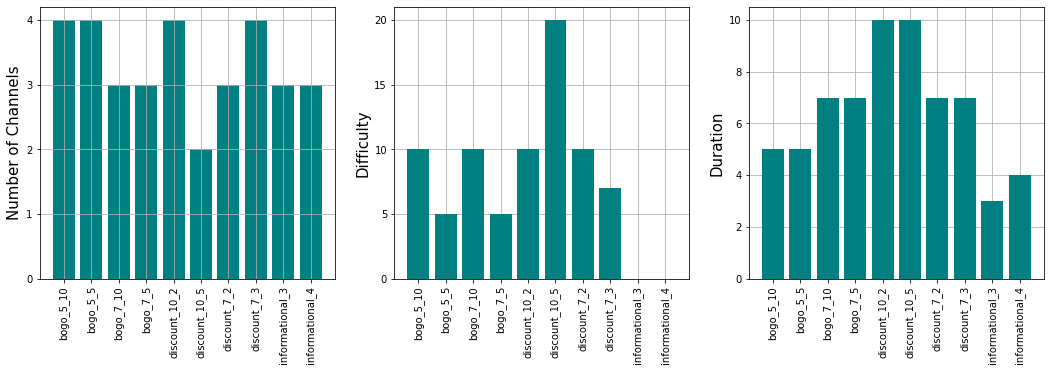

In [9]:
data_description = Processing.DataDescription(portfolio, profile, transcript)
data_description.describe_portfolio()

<div style="text-align: justify"> 
Above, we can see in the first plot that there are at most four channels through which offers are sent to users. While bogo_5_10, bogo_5_5, discount_10_5, and discount_7_3 are sent using four channels, the discount_10_5 is only sent via two channels. Not all the offers have the same level of difficulty (middle plot). There is no difficulty pertinent to informational offer and discount_10_5 has the highest difficulty. Moreover, the validity period varies from offer to offer. Informational offers have the lowest validity duration and discount_10_2 and discount_10_5 have the highest.
</div>

<div style="text-align: justify"> 
Now, we move on to the profile table and use the describe_profile function to explore this data. In the first plot below, we can see the number of users registers in each month cumulatively. We can see that in the last two quarters of the year, we usually see more users registered on the app with January following the same pattern, while the second quarter sees the least number of new registrations. In the second plot, we look at the same information by year. It is apparent that through years the app was able to attract more and more users with one caveat that the 2018 data goes only until July and we do not have the full data for that year. We can also see that the majority of the app users are male with 57.23%. <br>
    
    
Next, we look at the distribution of the continuous variables. In plot 4, we depict the distribution of age, which has an average of 54 and standard deviation of 17. Income is quite normally distributed with an average of 65,405. The distribution of membership days is multi-modal, with a median of 1,580.
    
In the last row of plots, we look at the same distribution by separately for each gender. Female users have a higher age average compared to their male counterparts (57.5 vs 52.1). That's also the case for income, where female users have an average of 71,306 and male users' average is 61,195. In terms of membership days, female users have a median of 1,622, while for male users the median is 1,565.
</div>

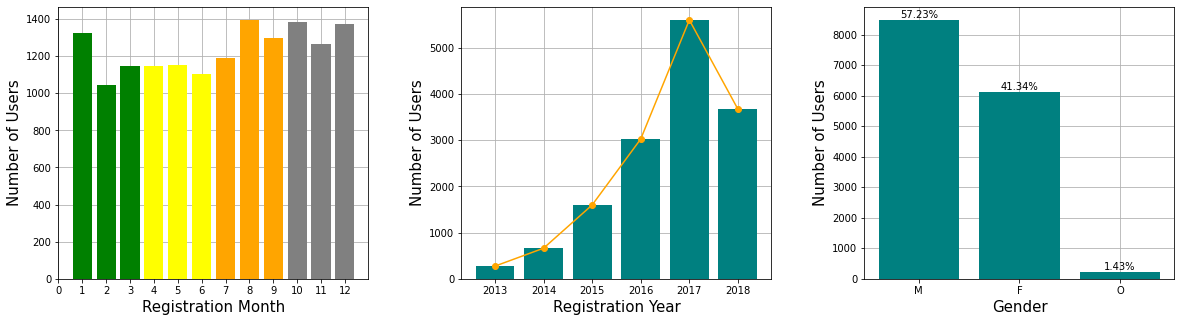

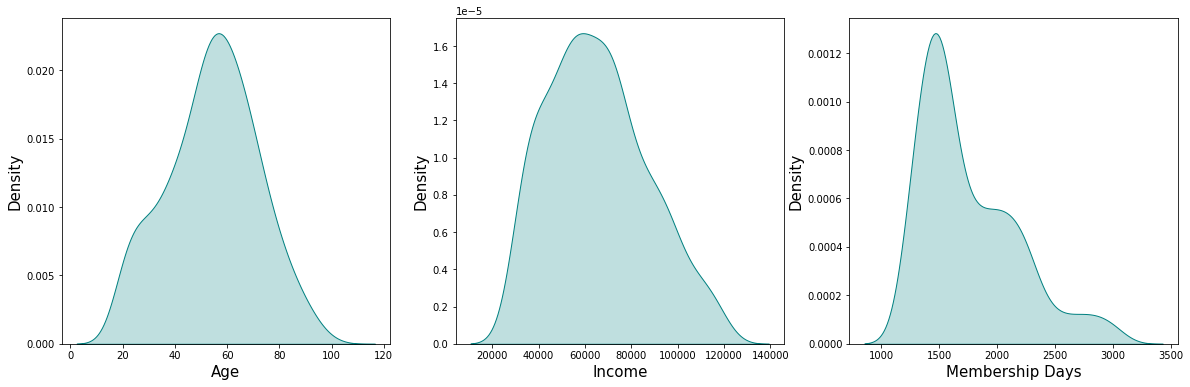

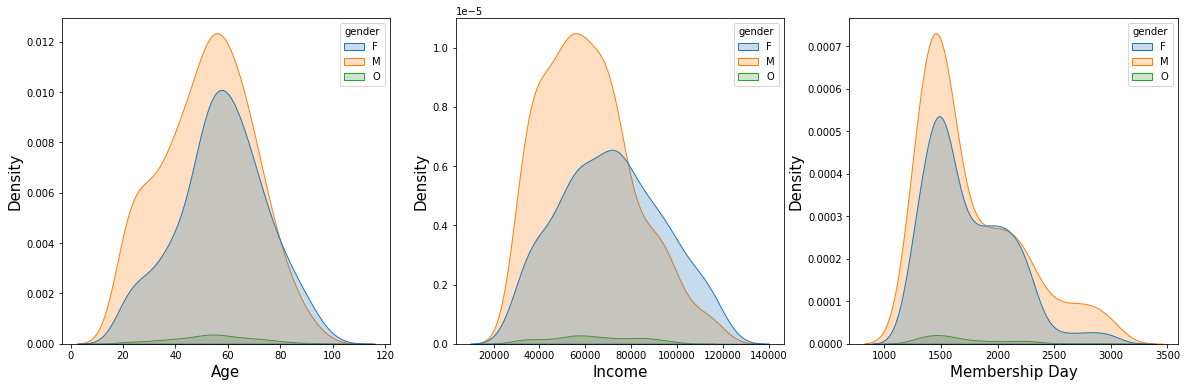

In [10]:
data_description.describe_profile()

<div style="text-align: justify"> 
Exploring the transcript table, in the first plot, we can see the distribution of the number of received offers per user. Around 65% of the users received 4 or 5 offers. Moreover, 18% of users received 6 offers which is the maximum number of offers sent to a user. Looking at the distribution of the number of viewed offers, it is almost normally distributed with almost half of the customer viewing 3 or 4 offers. Lastly, in the third plot, we observe that all offer types are sent out evenly. 
</div>

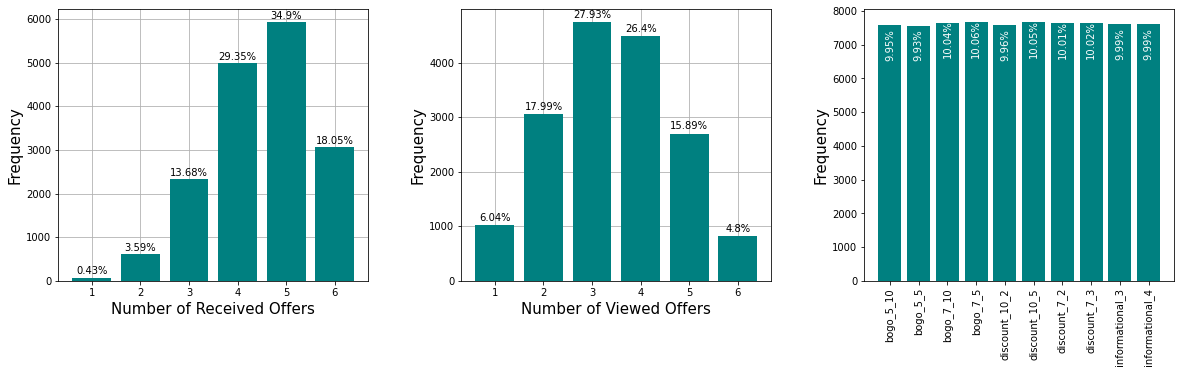

In [11]:
data_description.describe_transcript()

<div style="text-align: justify"> 
In the next step, we aim to merge all three table to create a unified view. To do so, we utilize the DataMerge class. There are four main functions in the class which will help us merging the data. Here, we explain how the data merge process is executed. We first start with the transcript table and create four subset tables by filtering on the event columns. Consequently, we will have a table for received offers, viewed offers, transactions, and completed offers. The first two tables are joined using person and offer_id columns. Then we add in the transactions using the person column. Finally, we merge the completed offers table using person and offer_id column again. At this stage, there are rows that are redundantly created and we need to remove them. In order to do this, we define a set of logic to filter out redundant rows. A row is valid if (1) view time and complete time are null, or (2) view time is larger than receive time and complete time is larger than receive time, or (3) view time is larger than receive time and and complete time is larger than receive time, or (4) view time is larger than receive time and the complete time is null. <br> 
After removing redundant rows, we aim to find offers that have been either tried or been successful. To achieve this, we again define a set of logics as following: <br> 
&nbsp; A. If viewed time is null: <br> 
&nbsp;&nbsp; - The offer is unsuccessful.  <br> 
&nbsp;&nbsp; - If the offer is informational, and there is a transaction between the receive time and offer expiry time, the offer is assumed to be tried. <br> 
&nbsp;&nbsp; - If the offer is not informational, and complete time is between receive time and expiry time, the offer is deemed to be tried. <br> 
&nbsp; B. If the viewed times is not null: <br> 
&nbsp;&nbsp; - If offer is informational and transaction time is null, the offer is unsuccessful. <br> 
&nbsp;&nbsp; - if there is a transaction between the receive time and expiry time, the offer has been tried. If the transaction has been happened after viewing the offer and before the expiry time, the offer is successful. <br> 
&nbsp;&nbsp; - if the offer is not informational, complete time is larger than view time and less than expiry time, the offer has been successful. <br> 
&nbsp;&nbsp; - if an offer was successful, it is assumed to be tried but not necessarily the other way around. <br> 
    
Next, we append portfolio and profile tables to this newly created table using the append_other_data function and save the final table using the save_data function.
</div>

In [12]:
data_merge = Processing.DataMerge(portfolio,profile,transcript)
merged_data = data_merge.data_merge()
merged_data = data_merge.remove_redundant_data()
merged_data = data_merge.find_success_tried_offers()
merged_data = data_merge.append_other_data()
# data_merge.save_data()

In [13]:
merged_data.head()

,person,offer_id,original_reward,time_received,duration,time_viewed,time_completed,reward,successful_offer,tried_offer,...,membership_month,membership_year,offer_type,num_channels,offer_reward,difficulty,channel_email,channel_mobile,channel_social,channel_web
0,user_100,bogo_7_10,0.0,336.0,7.0,NaN,NaN,NaN,0,0,...,7.0,2016.0,bogo,3,10,10,1,1,1,0
1,user_100,discount_10_5,0.0,0.0,10.0,NaN,NaN,NaN,0,0,...,7.0,2016.0,discount,2,5,20,1,0,0,1
2,user_100,discount_10_5,0.0,576.0,10.0,NaN,NaN,NaN,0,0,...,7.0,2016.0,discount,2,5,20,1,0,0,1
3,user_100,informational_4,0.0,408.0,4.0,NaN,NaN,NaN,0,0,...,7.0,2016.0,informational,3,0,0,1,1,0,1
4,user_10002,informational_4,0.0,336.0,4.0,NaN,NaN,NaN,0,0,...,11.0,2015.0,informational,3,0,0,1,1,0,1


<div style="text-align: justify"> 
Now that we have a definition for tried and successful offers, we can look at the trying and success rates for each offer. Looking at the plot below on the left in the first row, bogo_7_10, discount_10_2, and discount_7_3 have high trying rate, while discount_10_5 and informational_4 have low trying rate. The plot on the right tells us that discount_10_2 and discount_7_3 also have high success rate; on the other hand, informational_4 and discount_10_5 have low success rate.
    
We can also look at these rates by some of the descriptive variables that we have. Plots in the second row demonstrate that female customers tend to try and complete an offer successfully more often than male customers. To investigate the association between age and trying and success rates, we can bin the age variable into five buckets including very young, young, middle age, old, and very low. Interestingly, the first bucket (very young customers) exhibits the highest trying rate, but the lowest success rate. Following the same approach for income, we group customers into five groups (very low, low, medium, high, and very high). Going higher into the income spectrum, customers tend to have lower trying rate but higher success rate.
</div>

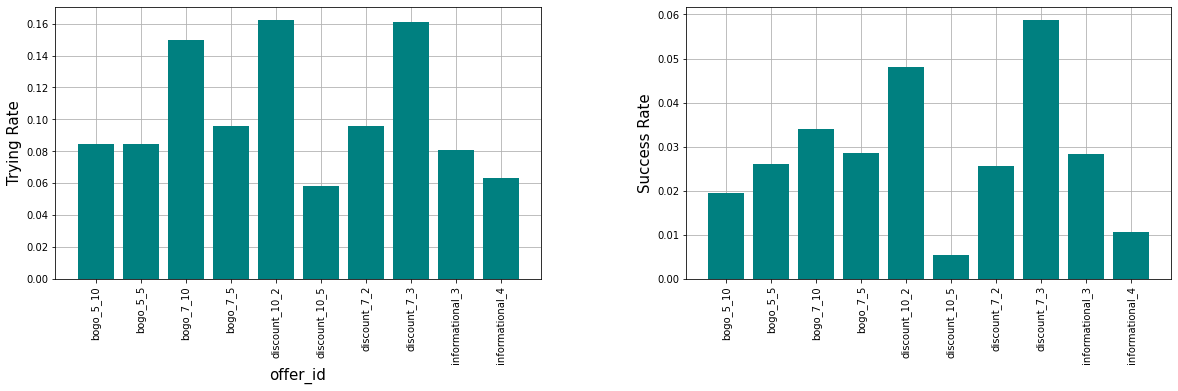

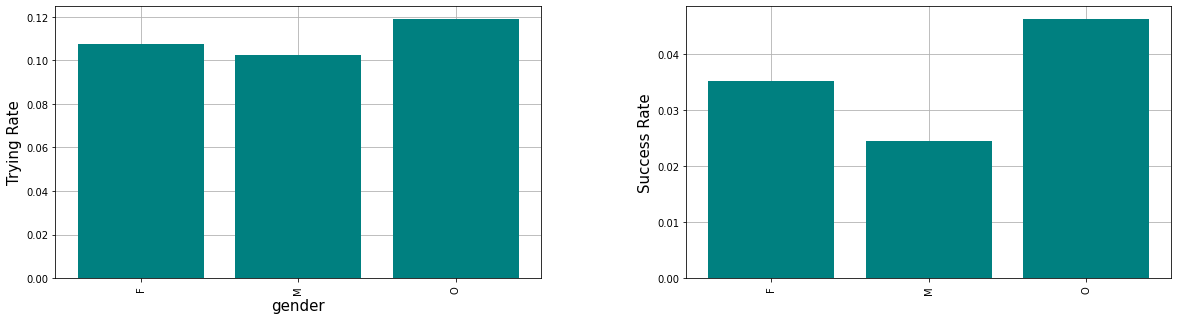

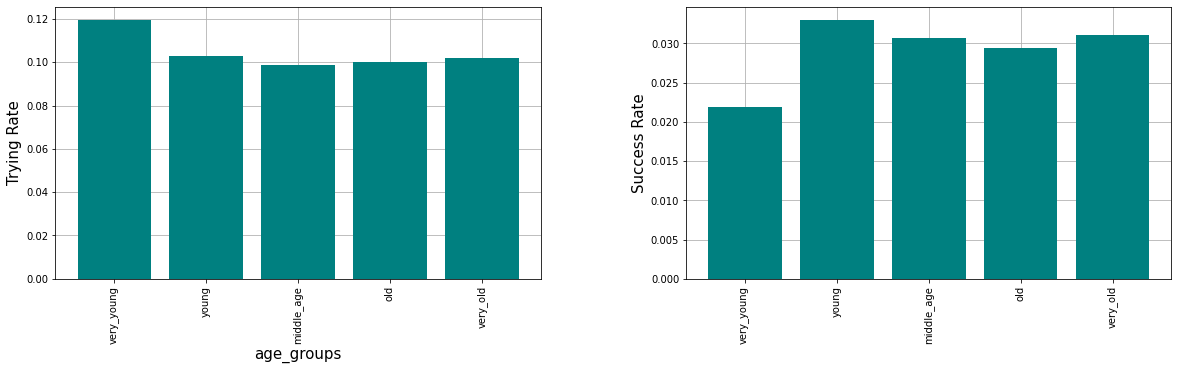

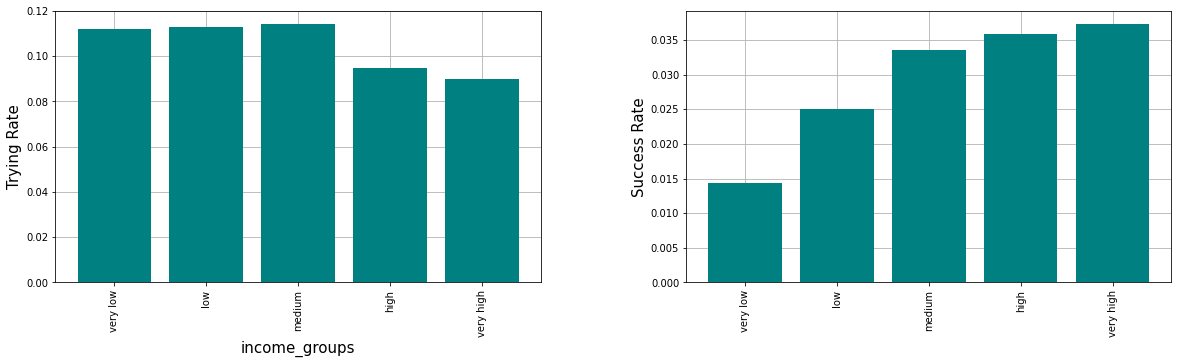

In [14]:
Processing.offer_performance(merged_data, "offer_id")
Processing.offer_performance(merged_data, "gender")
Processing.offer_performance(merged_data, "age")
Processing.offer_performance(merged_data, "income")

<div style="text-align: justify"> 
This EDA has helped us clean, manipulate, and merge the tables available; moreover, we extracted insights about the properties of each variable. We also specified whether an offer has been tried or been successful. The final table created in this script can be used to achieve the other two goals that we have defined in the project. The immediate next step from here is to use the knowledge gathered in the EDA step to build a predictive model, predicting whether an offer sent to a customer will be successful or not.     
</div>

In [40]:
import pandas as pd
import numpy as np
import math
import json
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, auc, roc_curve, f1_score
import dask_ml.model_selection as dcv

from sklearn.model_selection import train_test_split
import lightgbm as lgb

import random
import imblearn as imblearn
from sklearn.preprocessing import MinMaxScaler

import Modeling_Helper
import Processing

import optuna
from optuna.samplers import TPESampler


import shap
shap.initjs()


import warnings
warnings.simplefilter('always', category=UserWarning)
warnings.simplefilter(action='ignore', category=FutureWarning)
pd.set_option('mode.chained_assignment', None)
import statsmodels.api as sm


In [16]:
import statsmodels as plt
print(plt.__version__)

0.12.1


# Predictive Modeling



## Logistic Regression

<div style="text-align: justify"> In the previous step, we ran EDA to understand the datasets and combine them while specifying which offer was successful. Here, we hypothesize that customer characteristics and offer attributes are associated with the likelihood of an offer becoming successful. To examine this hypothesis, we will build predictive models to find these potential associations. It is worth noting that while this model can provide insights about the purchasing likelihood, it cannot be directly used as a recommendation model. <br> <br>
To begin, we build a logistic model and use it as our baseline. The DataPrep class in the Modeling_Helper package can help us to to read the data, specify features, and create dummy variables upon categorical features.
The continuous variables are: <br>
&nbsp;&nbsp;&nbsp;&nbsp;            - age <br>
&nbsp;&nbsp;&nbsp;&nbsp;            - income <br>
&nbsp;&nbsp;&nbsp;&nbsp;            - membership_days <br>
&nbsp;&nbsp;&nbsp;&nbsp;            - duration <br>
&nbsp;&nbsp;&nbsp;&nbsp;            - difficulty <br>
&nbsp;&nbsp;&nbsp;&nbsp;            - num_channels <br>
&nbsp;&nbsp;&nbsp;&nbsp;            - channel_mobile (binary) <br>
&nbsp;&nbsp;&nbsp;&nbsp;            - channel_social (binary) <br>
&nbsp;&nbsp;&nbsp;&nbsp;            - channel_web (binary), <br>

and categorical variables are: <br>
&nbsp;&nbsp;&nbsp;&nbsp;            - offer_id <br>
&nbsp;&nbsp;&nbsp;&nbsp;            - offer_type <br>
&nbsp;&nbsp;&nbsp;&nbsp;            - offer_reward <br>
&nbsp;&nbsp;&nbsp;&nbsp;            - gender <br>
&nbsp;&nbsp;&nbsp;&nbsp;            - membership_month <br>
&nbsp;&nbsp;&nbsp;&nbsp;            - membership_year <br>
</div>

In [3]:
data_prep = Modeling_Helper.DataPrep()
data_prep.prep_data_logistic()
modeling_data = data_prep.modeling_data
features = data_prep.features
y_var = data_prep.y_var
modeling_data.head()

,person,offer_id,time_received,offer_type,duration,offer_reward,difficulty,num_channels,channel_email,channel_mobile,...,membership_month_8.0,membership_month_9.0,membership_month_10.0,membership_month_11.0,membership_month_12.0,membership_year_2014.0,membership_year_2015.0,membership_year_2016.0,membership_year_2017.0,membership_year_2018.0
0,user_100,bogo_7_10,336.0,bogo,7.0,10,10,3,1,1,...,0,0,0,0,0,0,0,1,0,0
1,user_100,discount_10_5,0.0,discount,10.0,5,20,2,1,0,...,0,0,0,0,0,0,0,1,0,0
2,user_100,discount_10_5,576.0,discount,10.0,5,20,2,1,0,...,0,0,0,0,0,0,0,1,0,0
3,user_100,informational_4,408.0,informational,4.0,0,0,3,1,1,...,0,0,0,0,0,0,0,1,0,0
4,user_10002,informational_4,336.0,informational,4.0,0,0,3,1,1,...,0,0,0,1,0,0,1,0,0,0


<div style="text-align: justify"> We split the data into train and test using the DataSplit class in the Modeling_Helper package. We make sure that one person ID does not appear in both train and test set. Before building any model, we scale our variables and look at the correlation heatmap to see whether there are any highly correlation variables that we can remove. Looking at the heatmap below, we decide to keep all the variables that we have. However, the channel_email variables is dropped as it is equal to 1 for all offer IDs. 
</div>

In [4]:
data_split = Modeling_Helper.DataSplit('person', modeling_data, y_var, 0.8, 2021)
train_df, test_df = data_split.split_data()

In [5]:
scaler = MinMaxScaler(feature_range = (0,1))

scaler.fit(train_df.loc[:, features])
train_df.loc[: , features] = scaler.transform(train_df.loc[: , features])
test_df.loc[: , features] = scaler.transform(test_df.loc[: , features])

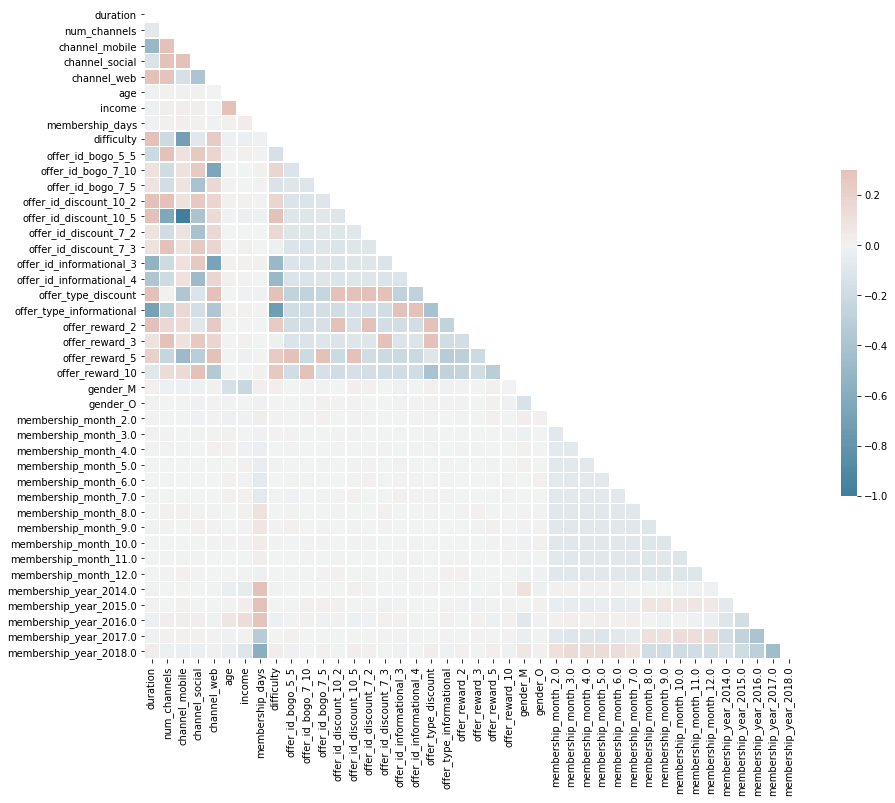

In [6]:
cor_df = Processing.correlation_map(train_df, data_prep.features)

<div style="text-align: justify"> Another characteristic of of our data is that it is highly imbalanced. The abundance of examples from the unsuccessful offers can swamp the successful ones.This means that if we train a model on such data, the algorithm will focus on learning the characteristics of the majority class only, neglecting the examples from the minority one whose predictions are more valuable. There are various ways to tackle this issue, with the most simple one being over-sampling the minority class which we use for our first model.
</div>

In [7]:
sm = imblearn.over_sampling.RandomOverSampler(random_state=2021)
X_train_res, y_train_res = sm.fit_resample(train_df[features], train_df[y_var].ravel())
X_train_res[y_var] = y_train_res

print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_train_res==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res==0)))

After OverSampling, the shape of train_X: (93062, 43)
After OverSampling, the shape of train_y: (93062,) 

After OverSampling, counts of label '1': 46531
After OverSampling, counts of label '0': 46531


In [8]:
import statsmodels.api as sm
X_train_res = sm.add_constant(X_train_res, has_constant='add')
logit_model=sm.Logit(X_train_res[y_var], X_train_res[['const']+features])
logit_model=logit_model.fit()
print(logit_model.summary2())

         Current function value: 0.607410
         Iterations: 35


Maximum Likelihood optimization failed to converge. Check mle_retvals


                                                 Results: Logit
Model:                              Logit                           Pseudo R-squared:                0.124      
Dependent Variable:                 successful_offer                AIC:                             113121.6194
Date:                               2021-12-11 14:53                BIC:                             113442.6142
No. Observations:                   93062                           Log-Likelihood:                  -56527.    
Df Model:                           33                              LL-Null:                         -64506.    
Df Residuals:                       93028                           LLR p-value:                     0.0000     
Converged:                          0.0000                          Scale:                           1.0000     
No. Iterations:                     35.0000                                                                     
--------------------------------

<div style="text-align: justify"> Building our logistic model, we can use the PerformanceAnalysis function (in Modeling_Helper) to analyze the performance. As shown below, the model results in an accuracy of 0.67, precision of 0.65, recall of 0.71, and F1 score of 0.68 on the train set and on the test set these numbers are 0.63, 0.05, 0.67, and 0.1. The train set's AUC is 0.73 and for test set, it is 0.69. It is apparent that there is a significant level of over-fitting, meaning that our model learned too much from the train set so that it is not able to generalize over the unseen data (test set).
</div>

************** Performance: Train Set **************** 

Accuracy: 0.67
Precision: 0.65
Recall: 0.71
F1: 0.68


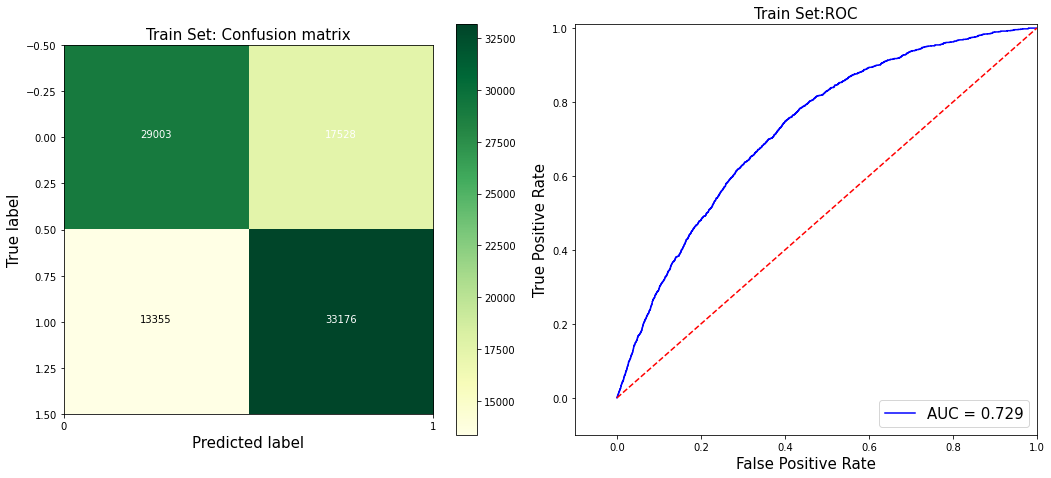

************** Performance: Test Set **************** 

Accuracy: 0.63
Precision: 0.05
Recall: 0.67
F1: 0.1


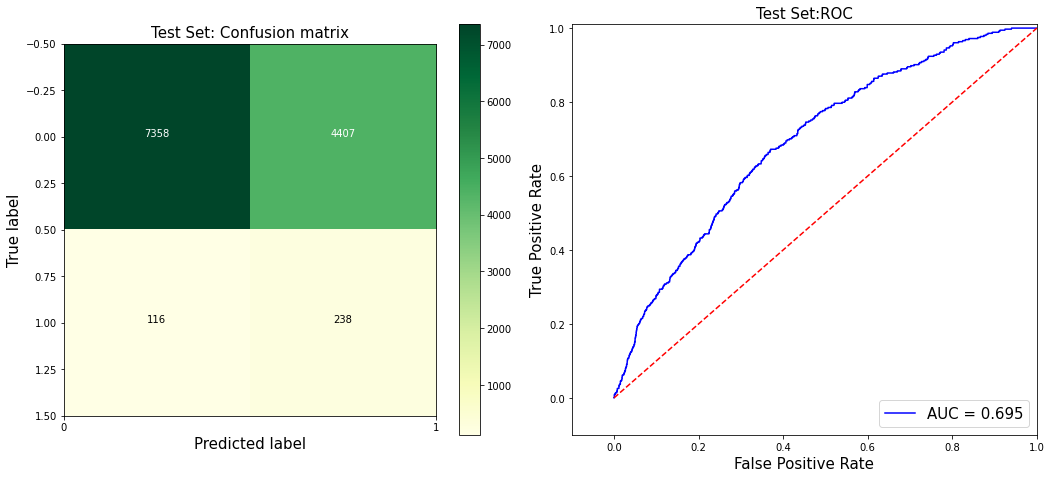

In [9]:
perf_analysis = Modeling_Helper.PerformanceAnalysis(logit_model, X_train_res, ["const"]+features, y_var, "Train Set", prob = False)
perf_analysis.perf_analysis()

test_df = sm.add_constant(test_df, has_constant="add")
perf_analysis = Modeling_Helper.PerformanceAnalysis(logit_model, test_df, ["const"]+features, y_var, "Test Set", prob = False)
perf_analysis.perf_analysis()

## Gradient Boosting Machines (GBM)

<div style="text-align: justify"> Having the logistic model as the baseline, now the question is whether we can train a better model. Gradient Boosting Machines or GBM models are a family of powerful machine learning algorithms that have been successfully leveraged and implemented in various domains. They are highly customizable to the particular needs of the application, like being learned with respect to different loss functions. Boosting is generally a technique for transforming weak learners into strong learners. Gradient boosting mainly consists of three components: (1) a loss function to be optimized which depends on the type of problem being solved, (2) a weak learner to make predictions which is a decision tree in this case, and (3) an additive model to add weak learners to minimize the loss function (i.e. follow the gradient) [<a href="https://www.frontiersin.org/articles/10.3389/fnbot.2013.00021/full">1</a>]. To build such a model, we use the LightGBM package which is a gradient boosting framework that uses tree-based learning algorithms [<a href="https://lightgbm.readthedocs.io/en/latest/">2</a>].
    
We can use the DataPrep class in Modeling_Helper to prepare the data and this time we use the prep_data_gbm function. One nice capability of the LightGBM is that it can handle categorical variables internally and we do not need to transform them into binary variables. The prep_data_gbm function takes care of this and changes the type of categorical columns to category. Similar to before, we use the DataSplit class to split the data into train and test. We would not tweak the parameters for the first iteration of the model; however, there are two which are essential. First, we need to specify the objective. objective specifies the learning task and the corresponding learning objective. this parameter is defaulted to regression but since our response variable is whether an offer was successful or not, we need to change it to binary. In building the logistic regression model, we mentioned that our data is imbalanced and we iterated the challenges it may impose the model with. We used over-sampling to remedy this issue. With out GBM model, we are going to follow a similar path but differently. Instead of over-sampling our data, we leverage the scale_pos_weight parameter which is the ratio of number of negative class to the positive class and can be used to scale the gradient for the positive class. this parameter ensures that errors made by the model during training on the positive class are scaled and it persuades to correct for them more often. As a result, the model will make better predictions on the positive class. Looking at the train set, this value is equal to 33.4. Building our first GBM model, We can achieve an accuracy of 0.77, precision of 0.11, recall of 0.95, and F1 score of 0.19 on the train set and on the test set these numbers are 0.76, 0.06, 0.5, and 0.1. The train set's AUC is 0.92 and for test set, it is 0.69.
 
</div>

In [10]:
data_prep = Modeling_Helper.DataPrep()
data_prep.prep_data_gbm()
modeling_data = data_prep.modeling_data
features = data_prep.features
cat_vars = data_prep.cat_vars
y_var = data_prep.y_var
modeling_data.head()

,person,offer_id,time_received,offer_type,duration,offer_reward,difficulty,num_channels,channel_email,channel_mobile,channel_social,channel_web,gender,age,income,membership_days,membership_month,membership_year,successful_offer
0,user_100,bogo_7_10,336.0,bogo,7.0,10,10,3,1,1,1,0,F,68.0,84000.0,1941.0,7.0,2016.0,0
1,user_100,discount_10_5,0.0,discount,10.0,5,20,2,1,0,0,1,F,68.0,84000.0,1941.0,7.0,2016.0,0
2,user_100,discount_10_5,576.0,discount,10.0,5,20,2,1,0,0,1,F,68.0,84000.0,1941.0,7.0,2016.0,0
3,user_100,informational_4,408.0,informational,4.0,0,0,3,1,1,0,1,F,68.0,84000.0,1941.0,7.0,2016.0,0
4,user_10002,informational_4,336.0,informational,4.0,0,0,3,1,1,0,1,M,69.0,62000.0,2193.0,11.0,2015.0,0


In [11]:
data_split = Modeling_Helper.DataSplit("person", modeling_data, y_var, 0.8, 2021)
train_df, test_df = data_split.split_data()
scale_pos_weight_val = (len(train_df)-sum(train_df[y_var]))/sum(train_df[y_var])
print(scale_pos_weight_val)

33.42744252873563


In [12]:
train_data = lgb.Dataset(train_df[features], label=train_df[y_var],free_raw_data=False)
test_data = lgb.Dataset(test_df[features], label=test_df[y_var], free_raw_data=False)

In [13]:
params = {"num_threads":-1, 
          "seed":2021, 
          "verbose": -1,
          "objective": "binary",  
          "scale_pos_weight":scale_pos_weight_val
         }

gbm_model = lgb.train(params,
            train_data,
            feature_name=features,
            categorical_feature=cat_vars,
            verbose_eval=-1,
                     )

categorical_feature in Dataset is overridden.
New categorical_feature is ['gender', 'membership_month', 'membership_year', 'offer_id', 'offer_reward', 'offer_type']


************** Performance: Train Set **************** 

Accuracy: 0.77
Precision: 0.11
Recall: 0.95
F1: 0.19


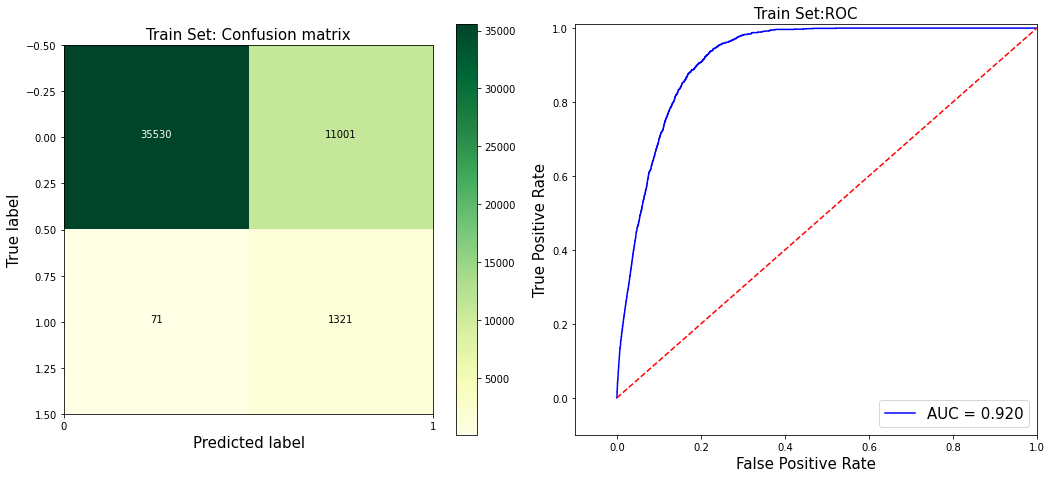

************** Performance: Test Set **************** 

Accuracy: 0.76
Precision: 0.06
Recall: 0.5
F1: 0.11


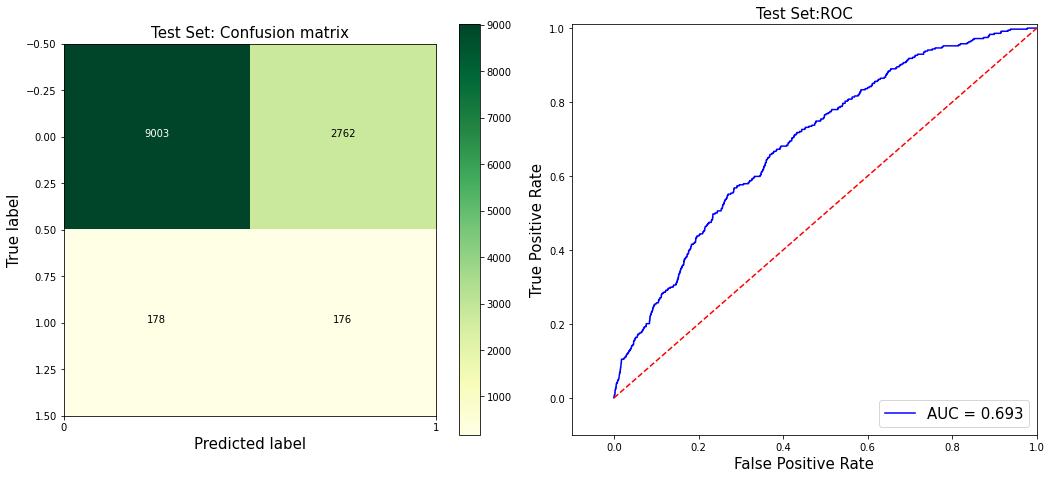

In [14]:
perf_analysis = Modeling_Helper.PerformanceAnalysis(gbm_model, train_df, features, y_var, "Train Set", prob = False)
perf_analysis.perf_analysis()
perf_analysis = Modeling_Helper.PerformanceAnalysis(gbm_model, test_df, features, y_var, "Test Set", prob = False)
perf_analysis.perf_analysis()

<div style="text-align: justify"> GBM models by themselves are not interpretable, at least not easily and GBMs are not alone in that. Many complex models that can achieve the highest accuracy for large modern datasets can be quite challenging to interpret. Lundberg and Lee however responded to that challenge and proposed the SHAP (SHapley Additive exPlanations) values that can show how much each independent variable contributes to the response variable [<a href="https://proceedings.neurips.cc/paper/2017/file/8a20a8621978632d76c43dfd28b67767-Paper.pdf">3</a>]. Leveraging SHAP values not only we can find the importance of each variable but also the positive/negative relationships that each variable has in regard to the response variable. These values can be found using the Python module shap. We use this package, to see how each variable in our dataset contributes into an offer becoming successful. Below, you can see our SHAP plot using the train set. Now, let's try and understand this plot. The dots your are seeing in this plot are pertinent to each observation in the train set. Variables are ranked based on the their importance. While for continuous variables we have a gradient of colors from blue to red indicating the feature value, categorical variables are naturally gray. The horizontal location specifies whether the effect of that value results in higher or lower predictions. Let's use income as an example. It seems that overall higher income is associated with higher likelihood of an offer becoming successful.
</div>

In [35]:
explainer = shap.TreeExplainer(gbm_model)
shap_values = explainer.shap_values(train_df[features])

LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray


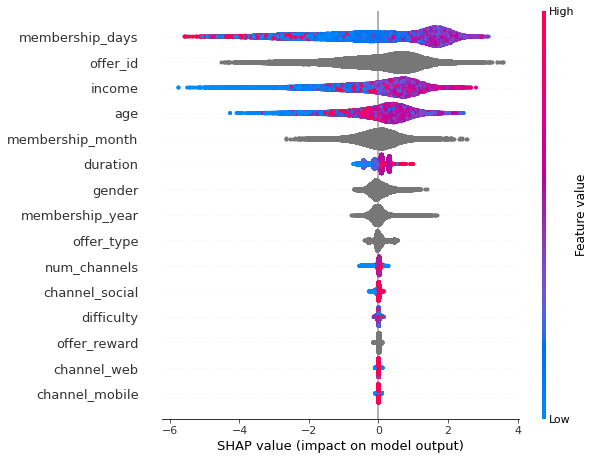

In [36]:
shap.summary_plot(shap_values[1], train_df[features], feature_names = features, max_display = 30)

<div style="text-align: justify"> Now, we try to improve our initial GBM model following three approaches:<br>
&nbsp;&nbsp;&nbsp;&nbsp;            - More feature engineering <br>
&nbsp;&nbsp;&nbsp;&nbsp;            - Hard encoding interactions <br>
&nbsp;&nbsp;&nbsp;&nbsp;            - Hyper-parameter tuning <br>
    
</div>

### GBM: Feature Engineering

<div style="text-align: justify"> One additional feature that we can add to the data is the cumulative number of offers that each user has received at each time. Our hypothesis is that the more that we target the users (sending more offers), users' likelihood of successfully completing an offer will increase. Another feature that we can tweak is the membership month. So far, we treated this variable as categorical, but is it really? The hour of day and the month of year are indeed cyclical features and they need to be transformed into a representation that can properly preserve information such as the 12th month and the first month are close to each other. A common method to encode cyclical features is to transform them into two dimensions using sine and cosine functions, as done below (Learn More [<a href="https://towardsdatascience.com/cyclical-features-encoding-its-about-time-ce23581845ca">4</a>]). Now we can include these two newly created continuous features in our model and maintain the cyclical nature of the month data. <br>
Tree-based method intrinsically take into account the interactions between independent variables. Having said that, we can hard-encode some of the interactions to make it easier for the model to pick them up. Looking at SHAP values, we found that membership days and income are among the most important variable in the model. We hypothesize that that there is an interactive effect among these two. We also include the interaction terms between income and the number of channels and between age and income.
</div>

In [15]:
modeling_data = modeling_data.sort_values(by = ["person", "time_received"]).reset_index(drop = True)
modeling_data["num_offers"] = modeling_data.groupby("person")["time_received"].transform(lambda group: group.astype("category").cat.codes + 1)
modeling_data["membership_month_sin"] = np.sin(2 * np.pi * modeling_data["membership_month"].astype(int) / 12)
modeling_data["membership_month_cos"] = np.cos(2 * np.pi * modeling_data["membership_month"].astype(int) / 12)
modeling_data["membership_days_X_income"] = modeling_data["membership_days"]*modeling_data["income"]
modeling_data["num_channels_X_income"] = modeling_data["num_channels"]*modeling_data["income"]
modeling_data["age_X_income"] = modeling_data["age"]*modeling_data["income"]

In [16]:
cont_vars = [
    "duration",
    "num_channels",
    "channel_email", 
    "channel_mobile", 
    "channel_social", 
    "channel_web",
    "age",  
    "income",
    "membership_days",
    "num_offers",
    "membership_days_X_income",
    "num_channels_X_income",
    "age_X_income",
    "membership_month_sin",
    "membership_month_cos",
    "difficulty",

]

cat_vars = [
    "offer_id",
    "offer_type",
    "offer_reward",
    "gender", 
    "membership_year"
]

features = cont_vars+cat_vars

y_var = "successful_offer"

for i in cat_vars:
    modeling_data.loc[:, i] = modeling_data[i].astype("category")

In [17]:
data_split = Modeling_Helper.DataSplit("person", modeling_data, y_var, 0.8, 2021)
train_df, test_df = data_split.split_data()
scale_pos_weight_val = (len(train_df)-sum(train_df[y_var]))/sum(train_df[y_var])

### GBM: Hyper-parameter Tuning

<div style="text-align: justify"> As we mentioned before, GBMs are highly customizable and there are many hyper-parameters that we can tune to achieve a better performance. Among many hyper-parameters, we will focus on the following ones:<br>
&nbsp;&nbsp;&nbsp;&nbsp;            - learning_rate: this can slow down or speed up the learning. Smaller values can decrease the influence of each individual tree and leaves space for future trees to improve the model. <br>
&nbsp;&nbsp;&nbsp;&nbsp;            - n_estimators: this determines the number of boosting iterations. The more trees the more accurate our model can be but at the same time, it will increase the training time and there will be a higher chance of over-fitting. <br>
&nbsp;&nbsp;&nbsp;&nbsp;            - max_depth: this controls the maximum depth of each trained tree. Smaller values can improve the training speed and address potential overfitting. <br>
&nbsp;&nbsp;&nbsp;&nbsp;            - num_leaves: this will control the complexity of the model. It specifies the maximum number of leaves each weak learner has. Large values will improve the accuracy of the model but also can the chance of over-fitting. <br>
&nbsp;&nbsp;&nbsp;&nbsp;            - colsample_bytree: this specifies the fraction of features to consider at each iteration. It can be used to speed up training and to deal with over-fitting. <br>
&nbsp;&nbsp;&nbsp;&nbsp;            - reg_alpha: this applies L1 regularization and can address over-fitting. <br>
&nbsp;&nbsp;&nbsp;&nbsp;            - reg_lambda: this applies L2 regularization and can address over-fitting.<br>
&nbsp;&nbsp;&nbsp;&nbsp;            - min_child_samples: this determines the minimal number of data in one leaf and can be used to deal with over-fitting. <br>
&nbsp;&nbsp;&nbsp;&nbsp;            - subsample: this specifies the percentage of observations (which are selected randomly) used in each iteration. Smaller values can improve the training speed since. It can also improve generalization over unseen data.  <br>

Now that we specified our hyper-parameters of interest, the question is how to tune them. The important note here is that we should not use our test set to do so as it will cause data leakage. We can either create a separate validation set or we can leverage cross-validation. Since we don't have a very large dataset to split it into three sets, we rely on cross-validation. There are various methods to find the best hyper-parameters including grid search and random search. However, here we utilize a specific method called Bayesian Optimization. Bayesian Optimization is a probabilistic approach to find the minimum of any function that returns a particular metric, particularly effective in hyper-parameter tuning for complex machine learning models. It utilizes the Bayes theorem by setting a prior over the objective function and find the posterior function by combining it with evidence coming from the data. Unlike grid and random search methods, this approach keeps track of previous results and uses them to create a model associating hyper-parameters to a probability. This technique will move our prior understanding of the hyper-parameters and re-shape them according to the structure of the dataset in hand (Learn More [<a href="https://static.sigopt.com/b/20a144d208ef255d3b981ce419667ec25d8412e2/static/pdf/SigOpt_Bayesian_Optimization_Primer.pdf">5</a>]). To implement this method, we use the Optuna module and create our own class called BayesianOpt (van be found in the Modeling_Helper). Below, we summarize the steps that we took to create this class: <br>
&nbsp;&nbsp;&nbsp;&nbsp;            - In the init function, specify the train set, features, response variable and the value for scale_pos_weight. <br>
&nbsp;&nbsp;&nbsp;&nbsp;            - In the call function, specify the hyper parameters to tune, and the range to search within. <br>
&nbsp;&nbsp;&nbsp;&nbsp;            - Build the GBM model with the found hyper-parameters. <br>
&nbsp;&nbsp;&nbsp;&nbsp;            - Use cross-validation to find the score associated with the hyper-parameters. <br>
&nbsp;&nbsp;&nbsp;&nbsp;            - Return the best score. <br>

We specify our score of interest to be the F1 score, meaning that the Bayesian optimization will try to find the best set of hyper-parameters to maximize the F1 score coming from the cross-validation on train set. We run our optimization for 100 iteration and will check the progress.

</div>

In [14]:
sampler = TPESampler(seed=2021)  
study = optuna.create_study(sampler = sampler, direction="maximize")
study.optimize(Modeling_Helper.BayesianOpt(train_df, features, y_var, scale_pos_weight_val), n_trials=100)

[I 2021-11-29 15:36:19,428] A new study created in memory with name: no-name-6643f4d6-bf3e-4aca-8416-569395d2ccc4
[I 2021-11-29 15:36:48,448] Trial 0 finished with value: 0.11309781035250034 and parameters: {'learning_rate': 0.0377391257196892, 'num_leaves': 45, 'colsample_bytree': 0.311157725382719, 'reg_alpha': 0.06980640530295552, 'reg_lambda': 4.915069954353206, 'max_depth': 5, 'min_child_samples': 148, 'subsample': 0.8023403430208751, 'n_estimators': 1493}. Best is trial 0 with value: 0.11309781035250034.
[I 2021-11-29 15:37:10,858] Trial 1 finished with value: 0.11111240402162112 and parameters: {'learning_rate': 0.10985555325894224, 'num_leaves': 7, 'colsample_bytree': 0.2468570280704288, 'reg_alpha': 3.958019320953226, 'reg_lambda': 0.4613919861163953, 'max_depth': 4, 'min_child_samples': 359, 'subsample': 0.6932197668943921, 'n_estimators': 1946}. Best is trial 0 with value: 0.11309781035250034.
[I 2021-11-29 15:37:44,555] Trial 2 finished with value: 0.1100649018418246 and pa

[I 2021-11-29 15:54:01,527] Trial 20 finished with value: 0.11611691740759032 and parameters: {'learning_rate': 0.021091124469863266, 'num_leaves': 50, 'colsample_bytree': 0.7595859838046863, 'reg_alpha': 0.02006614161782962, 'reg_lambda': 1.1206465330018285, 'max_depth': 14, 'min_child_samples': 227, 'subsample': 0.9258033626967777, 'n_estimators': 1168}. Best is trial 19 with value: 0.14152844269148004.
[I 2021-11-29 15:54:58,186] Trial 21 finished with value: 0.13569554672406198 and parameters: {'learning_rate': 0.0010564635078824474, 'num_leaves': 48, 'colsample_bytree': 0.9121774132569622, 'reg_alpha': 0.012110206548878798, 'reg_lambda': 1.1127096405786758, 'max_depth': 20, 'min_child_samples': 294, 'subsample': 0.8036450224570105, 'n_estimators': 1268}. Best is trial 19 with value: 0.14152844269148004.
[I 2021-11-29 15:55:56,790] Trial 22 finished with value: 0.13486596232653353 and parameters: {'learning_rate': 0.0010606589827079817, 'num_leaves': 48, 'colsample_bytree': 0.99642

[I 2021-11-29 16:07:47,979] Trial 40 finished with value: 0.10513325444616219 and parameters: {'learning_rate': 0.04825763182452712, 'num_leaves': 42, 'colsample_bytree': 0.9728621076503364, 'reg_alpha': 0.24610507171091725, 'reg_lambda': 0.15238080753879868, 'max_depth': 23, 'min_child_samples': 193, 'subsample': 0.3503539183961863, 'n_estimators': 708}. Best is trial 31 with value: 0.1419151566852487.
[I 2021-11-29 16:08:20,285] Trial 41 finished with value: 0.0 and parameters: {'learning_rate': 0.0014068344784059865, 'num_leaves': 47, 'colsample_bytree': 0.9266630061813697, 'reg_alpha': 0.0312518342839361, 'reg_lambda': 2.7642570517508283, 'max_depth': 26, 'min_child_samples': 502, 'subsample': 0.7687209138693255, 'n_estimators': 613}. Best is trial 31 with value: 0.1419151566852487.
[I 2021-11-29 16:08:56,020] Trial 42 finished with value: 0.13670659761248133 and parameters: {'learning_rate': 0.0018867683173548287, 'num_leaves': 45, 'colsample_bytree': 0.8989481756702321, 'reg_alph

[I 2021-11-29 16:18:08,219] Trial 60 finished with value: 0.14444501653001848 and parameters: {'learning_rate': 0.0016315997857535868, 'num_leaves': 27, 'colsample_bytree': 0.5366655308143199, 'reg_alpha': 0.07088850673123137, 'reg_lambda': 1.329795453959223, 'max_depth': 23, 'min_child_samples': 469, 'subsample': 0.9786795073787806, 'n_estimators': 664}. Best is trial 60 with value: 0.14444501653001848.
[I 2021-11-29 16:18:27,544] Trial 61 finished with value: 0.14505585908392027 and parameters: {'learning_rate': 0.001651540420257919, 'num_leaves': 26, 'colsample_bytree': 0.5546771722017886, 'reg_alpha': 0.11511983596488812, 'reg_lambda': 1.402881028322646, 'max_depth': 25, 'min_child_samples': 470, 'subsample': 0.966533554147176, 'n_estimators': 660}. Best is trial 61 with value: 0.14505585908392027.
[I 2021-11-29 16:18:46,474] Trial 62 finished with value: 0.14395856519425043 and parameters: {'learning_rate': 0.0016749421777113734, 'num_leaves': 25, 'colsample_bytree': 0.54064737378

[I 2021-11-29 16:26:00,978] Trial 80 finished with value: 0.1205143992592462 and parameters: {'learning_rate': 0.002474878388945733, 'num_leaves': 26, 'colsample_bytree': 0.5426246792608881, 'reg_alpha': 0.313271617386336, 'reg_lambda': 1.4050008159764267, 'max_depth': 22, 'min_child_samples': 197, 'subsample': 0.9817511102745612, 'n_estimators': 803}. Best is trial 61 with value: 0.14505585908392027.
[I 2021-11-29 16:26:59,318] Trial 81 finished with value: 0.11167258232817735 and parameters: {'learning_rate': 0.001911661615944234, 'num_leaves': 32, 'colsample_bytree': 0.5930420941776336, 'reg_alpha': 0.07690129633352104, 'reg_lambda': 2.3611942157410937, 'max_depth': 26, 'min_child_samples': 463, 'subsample': 0.8801981492145364, 'n_estimators': 1787}. Best is trial 61 with value: 0.14505585908392027.
[I 2021-11-29 16:27:19,017] Trial 82 finished with value: 0.14207469250384364 and parameters: {'learning_rate': 0.0018732900800033955, 'num_leaves': 29, 'colsample_bytree': 0.45007201019

<div style="text-align: justify"> In the plot below, you can see the cumulative best F1 score in each iteration. We started from an F1 score of around 0.11 and we were able to improve it to 0.145 after 100 iterations. The best hyper-parameters found are as following:<br>
&nbsp;&nbsp;&nbsp;&nbsp;            - learning_rate: 0.00165 <br>
&nbsp;&nbsp;&nbsp;&nbsp;            - n_estimators: 660 <br>
&nbsp;&nbsp;&nbsp;&nbsp;            - max_depth: 25 <br>
&nbsp;&nbsp;&nbsp;&nbsp;            - num_leaves: 26 <br>
&nbsp;&nbsp;&nbsp;&nbsp;            - colsample_bytree: 0.555 <br>
&nbsp;&nbsp;&nbsp;&nbsp;            - reg_alpha: 0.115 <br>
&nbsp;&nbsp;&nbsp;&nbsp;            - reg_lambda: 1.403 <br>
&nbsp;&nbsp;&nbsp;&nbsp;            - min_child_samples: 470 <br>
&nbsp;&nbsp;&nbsp;&nbsp;            - subsample: 0.967  <br>
 
</div>

Optuna best score = 0.1451


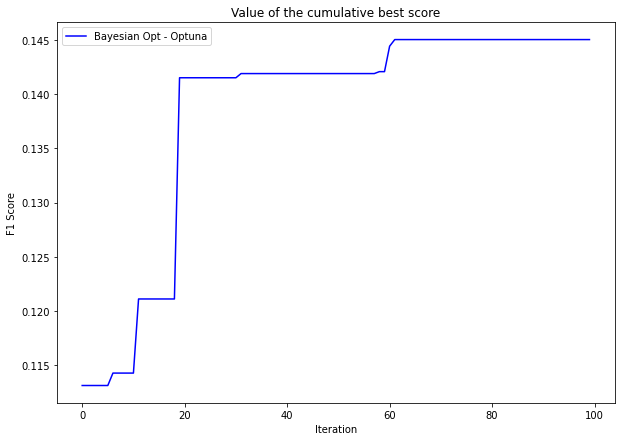

In [15]:
op_tuna_cummax = np.array(study.trials_dataframe()["value"].cummax()) 
print(f"Optuna best score = {op_tuna_cummax[-1]:.4f}"")
fig = plt.figure(figsize = (10, 7))
plt.plot(op_tuna_cummax, "b", label="Bayesian Opt - Optuna")
plt.xlabel("Iteration")
plt.ylabel("F1 Score")
plt.title("Value of the cumulative best score");
plt.legend()

### GBM: Final Model

<div style="text-align: justify"> Now, we take the best hyper-parameters found from the Bayesian Optimization and build our final model and assess the performance on both train and test sets. As shown below, this model achieved an accuracy of 0.92, precision of 0.11, recall of 0.24, and F1 score of 0.15 on the train set and on the test set these numbers are 0.92, 0.11, 0.24, and 0.15. The train set's AUC is 0.8 and for test set, it is 0.75.
 
</div>

In [16]:
best_params = study.best_params
best_params

{'learning_rate': 0.001651540420257919,
 'num_leaves': 26,
 'colsample_bytree': 0.5546771722017886,
 'reg_alpha': 0.11511983596488812,
 'reg_lambda': 1.402881028322646,
 'max_depth': 25,
 'min_child_samples': 470,
 'subsample': 0.966533554147176,
 'n_estimators': 660}

In [19]:
train_data = lgb.Dataset(train_df[features], label=train_df[y_var],free_raw_data=False)
test_data = lgb.Dataset(test_df[features], label=test_df[y_var], free_raw_data=False)

In [20]:
params = {"objective": "binary", "metric": ["binary_logloss", "binary_error"], "num_threads":-1, "seed":2021, "verbose": -1,
              
            "learning_rate":best_params["learning_rate"], 
            "num_leaves":best_params["num_leaves"], 
            "colsample_bytree": best_params["colsample_bytree"],
            "reg_alpha":best_params["reg_alpha"],
            "reg_lambda": best_params["reg_lambda"],
            "max_depth": best_params["max_depth"],
            "min_child_samples": best_params["min_child_samples"],
            "subsample": best_params["subsample"],
            "n_estimators": best_params["n_estimators"],

            "scale_pos_weight":scale_pos_weight_val
         }

gbm_model = lgb.train(params,
            train_data,
            feature_name=features,
            categorical_feature=cat_vars,
            verbose_eval=-1,
                     )

Found `n_estimators` in params. Will use it instead of argument
categorical_feature in Dataset is overridden.
New categorical_feature is ['gender', 'membership_year', 'offer_id', 'offer_reward', 'offer_type']


************** Performance: Train Set **************** 

Accuracy: 0.92
Precision: 0.11
Recall: 0.24
F1: 0.15


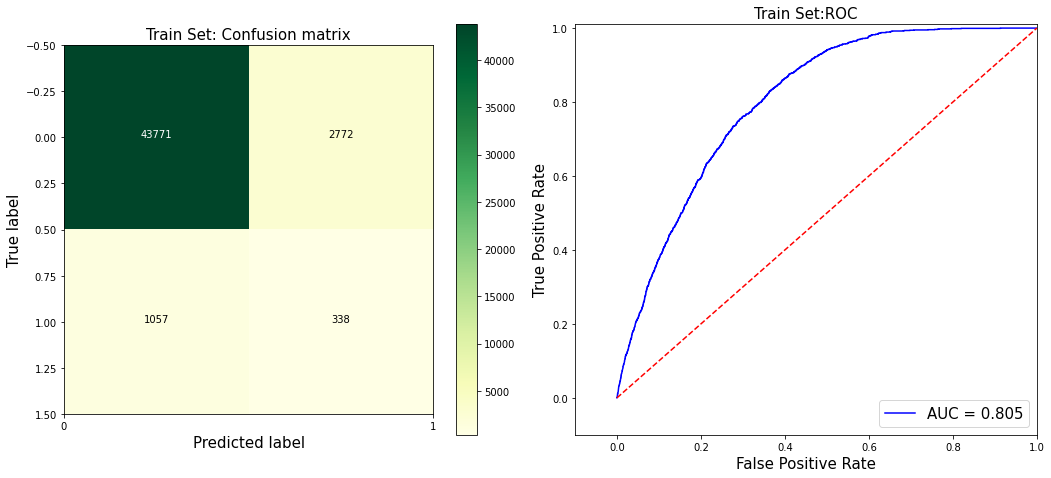

************** Performance: Test Set **************** 

Accuracy: 0.92
Precision: 0.11
Recall: 0.24
F1: 0.15


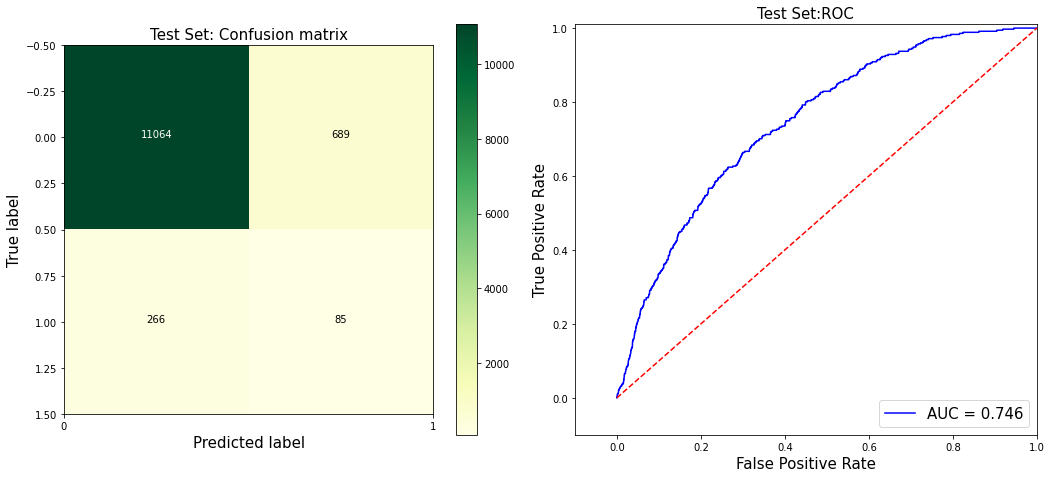

In [21]:
perf_analysis = Modeling_Helper.PerformanceAnalysis(gbm_model, train_df, features, y_var, "Train Set", prob = False)
perf_analysis.perf_analysis()
perf_analysis = Modeling_Helper.PerformanceAnalysis(gbm_model, test_df, features, y_var, "Test Set", prob = False)
perf_analysis.perf_analysis()

<div style="text-align: justify"> Let's see how much we were able to improve our baseline model (logistic regression). We were able to improve our metric of interest (F1 score) by 50%, along with the AUC, accuracy, precision, and recall. Another interesting achievement here is that we were able to address a lot of the over-fitting that we observed in our logistic model and now the performance metrics in our train and test set are close to each other. Taking another look at the SHAP values, we observe that some of the hard-encoded interaction terms that we defined are among the most important features. We save this model so can be used later on for scoring purposes.
</div>

In [22]:
performance_dict = {"logistic":{"auc": 0.695,
"accuracy": 0.63,
"precision": 0.05,
"recall": 0.67,
"f1_score": 0.1}, "gbm": {"auc": 0.746,
"accuracy": 0.92,
"precision": 0.11,
"recall": 0.24,
"f1_score": 0.15}}

In [23]:
Modeling_Helper.performance_comparison(performance_dict)

Improvement in AUC:  7.34 %
Improvement in Accuracy:  46.03 %
Improvement in Precision:  120.0 %
Improvement in Recall:  -64.18 %
Improvement in F1 Score:  50.0 %


In [75]:
explainer = shap.TreeExplainer(gbm_model)
shap_values = explainer.shap_values(train_df[features])

LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray


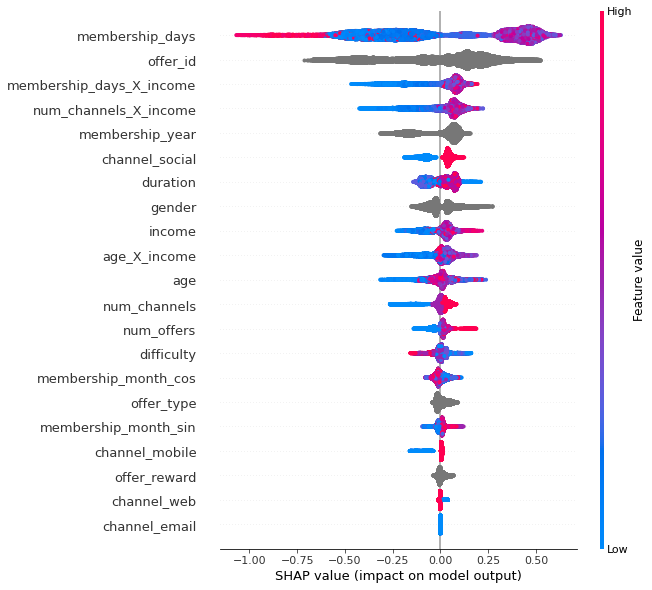

In [76]:
shap.summary_plot(shap_values[1], train_df[features], feature_names = features, max_display = 30)

In [77]:
# save model
joblib.dump(gbm_model, 'gbm_model.pkl')

['gbm_model.pkl']

In [2]:
import pandas as pd
import numpy as np
import math
import json
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, auc, roc_curve, f1_score
import dask_ml.model_selection as dcv

from sklearn.model_selection import train_test_split
import lightgbm as lgb

import random
import imblearn as imblearn
from sklearn.preprocessing import MinMaxScaler

import Modeling_Helper
import Processing

import optuna
from optuna.samplers import TPESampler
import joblib



import shap
shap.initjs()


import warnings
warnings.simplefilter('always', category=UserWarning)
warnings.simplefilter(action='ignore', category=FutureWarning)
pd.set_option('mode.chained_assignment', None)
import statsmodels.api as sm


# Uplift Modeling

<div style="text-align: justify"> One of the goals of this project is to design a recommendation system which can assist the mobile app in intelligently sending offers to customers. The logic here is each offer acts as an intervention and an offer should be sent to a customer whose likelihood of purchasing <b>increases</b> if he/she receives the offer. For instance, let's assume customer A's likelihood of purchasing without any offer is 0.7, and if we send him an offer, it will increase to 0.8. On the other hand, customer B will buy our product with the probability of 0.3 and in case of receiving an offer, it will go up to 0.6. While the offer increases customer A's purchasing likelihood by 0.1, this difference for customer B is 0.3. It is evident that customer B is a better candidate to receive our offer. Interestingly, if were to only use a predictive model and utilize the scores to decide which customers to target, we would select customer A. This whole framework is called Uplift Modeling (also known as incremental modeling) which aims to find the <i>change</i> in the likelihood of an event. Uplift modeling is particularly useful in marketing campaigns, as it helps marketing teams to measure the effectiveness of their tactics and isolate their influence. The fundamental issue in uplift modeling is that we cannot measure the effect of an intervention on one individual customer, simply because a customer can either receive or not receive an offer. In this case, what we can do is estimate the uplift based on groups of similar customers. In particular, we classify all customers into four main groups:</div>

![uplift.png](images/uplift.png)

<div style="text-align: justify"> <i>Persuadables</i> are customers who we need to identify and target. These are customers who will purchase our product only if targeted by our treatment/offer. <i>Sure things</i> are will buy our product even if they do not receive any offer. <i>Lost causes</i> are customers are who are not going to purchase even if there are treated. These two groups have zero uplift. Treating these customers would be synonymous with wasting marketing money. The last group is called <i>sleeping dogs</i>. These are customers whose likelihood of purchasing will decrease if treated. It is important to identify these customers as well, since we do not want to lose customers with our marketing activities.</div>

<div style="text-align: justify"> There are three main approaches towards uplift modeling. (1) tree-based algorithms which model uplift directly [<a href="https://proceedings.mlr.press/v67/gutierrez17a/gutierrez17a.pdf">7</a>], [<a href="https://dspace.mit.edu/handle/1721.1/119250">8</a>], (2) meta-learners which model uplift indirectly [<a href="https://arxiv.org/abs/1706.09523">9</a>], [<a href="https://www.pnas.org/content/116/10/4156">10</a>], [<a href="https://arxiv.org/abs/1712.04912">11</a>] (3) and class variable transformation which makes uplift predictable by transforming the response variable [<a href="https://people.cs.pitt.edu/~milos/icml_clinicaldata_2012/Papers/Oral_Jaroszewitz_ICML_Clinical_2012.pdf">12</a>]. <br>
Uplift models are usually applied on the data collected throughout AB testing where the entire population is randomly divided into two groups: control group where there is no treatment applied and test group where all customers will be treated by our intervention. In our problem here, we don't have a proper control group to compare each treatment two. All customers are treated by at least one type of offer. However, we can make some assumptions here. We can assume that our control group consists of customers who have received informational offer. Accordingly, we can assume that other types of offers are our treatments. When there is more than one treatment, uplift modeling can become quite complicated. To keep things simple, we leverage the S-learner approach. <br>
    
S-learner algorithm estimates the response variable using all independent variables including the treatment indicator using a single model. The estimation has two steps. First, we build a predictive model associating all variables with the response variable. Then we we predict the response variable once assuming that the treatment indicator is equal to control and then assuming it is equal to treatment (while all other variables are kept fixed). The difference between these two values will be the estimated uplift. These steps can be shown mathematically: <br> <br>
&nbsp;&nbsp;&nbsp;&nbsp;            Step 1: estimate the average outcome $\mu(x) = E[Y|X=x, T=t]$ using a machine learning algorithm. <br>
&nbsp;&nbsp;&nbsp;&nbsp;            Step 2: define uplift as: $\widehat{\tau }(x)=\widehat{\mu }(x, T = 1)-\widehat{\mu }(x, T = 0)$ <br> <br>

Luckily, we have already done step 1 in the previous section where we built our predictive model. Let's see whether we can use the same model to estimate uplift and accordingly build a recommendation engine. We now prepare the data so we can use the GBM model that we already saved, split the data into train and test as before and read the model object.
 
</div>

In [3]:
data_prep = Modeling_Helper.DataPrep()
data_prep.prep_data_gbm()
modeling_data = data_prep.modeling_data
y_var = data_prep.y_var
modeling_data = modeling_data.sort_values(by = ["person", "time_received"]).reset_index(drop = True)
modeling_data["num_offers"] = modeling_data.groupby("person")["time_received"].transform(lambda group: group.astype("category").cat.codes + 1)
modeling_data["membership_month_sin"] = np.sin(2 * np.pi * modeling_data["membership_month"].astype(int) / 12)
modeling_data["membership_month_cos"] = np.cos(2 * np.pi * modeling_data["membership_month"].astype(int) / 12)
modeling_data["membership_days_X_income"] = modeling_data["membership_days"]*modeling_data["income"]
modeling_data["num_channels_X_income"] = modeling_data["num_channels"]*modeling_data["income"]
modeling_data["age_X_income"] = modeling_data["age"]*modeling_data["income"]

In [4]:
cont_vars = [
    "duration",
    "num_channels",
    "channel_email", 
    "channel_mobile", 
    "channel_social", 
    "channel_web",
    "age",  
    "income",
    "membership_days",
    "num_offers",
    "membership_days_X_income",
    "num_channels_X_income",
    "age_X_income",
    "membership_month_sin",
    "membership_month_cos",
    "difficulty",

]

cat_vars = [
    "offer_id",
    "offer_type",
    "offer_reward",
    "gender", 
    "membership_year"
]
features = cont_vars+cat_vars

y_var = "successful_offer"

for i in cat_vars:
    modeling_data.loc[:, i] = modeling_data[i].astype("category")

In [5]:
gbm_model = joblib.load("./model/gbm_model.pkl")

In [6]:
data_split = Modeling_Helper.DataSplit("person", modeling_data, y_var, 0.8, 2021)
train_df, test_df = data_split.split_data()

## Predict Uplift: S-Learner Model

<div style="text-align: justify"> In the Modeling_Helper module, we created a class called FindUplift which we use the predict the uplift for each customer. This class has two main components:<br>
&nbsp;&nbsp;&nbsp;&nbsp;     1. Find the uplift: <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;        1.1. Predict the outcome if the offer was informational. Since we have two informational offers, we make two predictions and use the maximum probability. This will be our prediction if the customer was assigned to control. <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;    1.2. For all other offer types, similarly predict the outcome. <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;    1.3. Find the uplift of each offer type by subtracting probabilities found in the previous step from the probabilities in the first step. <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;    1.4. Find the maximum uplift across offer types. This will be our final best uplift likely to be achieved from treating a customer. <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;    1.5. Find the offer type which is associated with the maximum uplift. <br>
&nbsp;&nbsp;&nbsp;&nbsp;    2. Create the uplift curve: <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;    2.1. Rank the customers by their predicted uplift (x-axis). Find the cumulative number of successful offers in the treatment group (scaled by the cumulative treatment size) minus the cumulative number of successful offers in the control group (scaled by the cumulative control size). <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;    2.2. Redo the previous step but this time randomly order the customers. This will find the uplift curve in case of randomly sending offers to customers. <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;    2.3. Calculate the area under the uplift curve for the model and for the random assignment. <br>
    
First, we predict uplift in our train set. In the uplift plot below, the blue line shows the cumulative gain if we were using this model's recommendations to send out offers and the orange line shows the same thing but in case of randomly sending out offers. We can see that the our model outperforms the random assignment. Putting into numbers, the AUUC of the model is 545, while for the random assignment it is only equal to 288 (95% relative improvement).
</div>

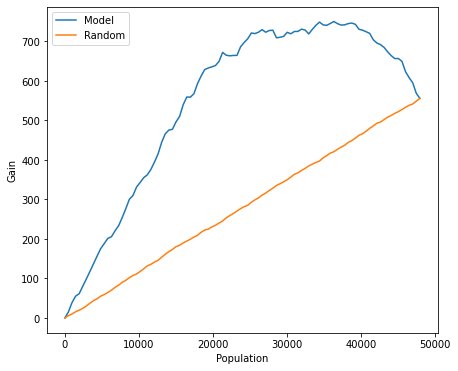

Model AUUC: 544.98    Random AUUC: 278.94


In [7]:
uplift_train = Modeling_Helper.FindUplift(gbm_model, train_df)
uplift_train.find_uplift()
uplift_train.calculate_auuc()

<div style="text-align: justify"> Now, let's see how our model performs on the test set. As shown below, our model achieves a better AUUC (152) compared to the random assignment (96), by providing 58% relative improvement.
</div>

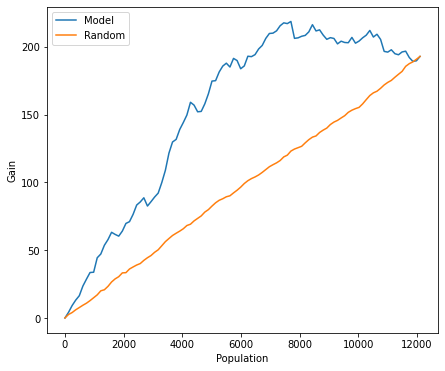

Model AUUC: 152.47    Random AUUC: 96.27


In [8]:
uplift_test = Modeling_Helper.FindUplift(gbm_model, test_df)
uplift_test.find_uplift()
uplift_test.calculate_auuc()

## Predict Uplift: Baseline

<div style="text-align: justify"> While we showed that our model outperforms a random assignment, the question remaining is that whether it also performs better than the strategy upon which the offers have been sent out in the first place. To make this comparison, we use the find_baseline_uplift function in the FindUplift class and similar to before calculate the AUUC. In the plots below, we can observe that the baseline strategy performs better than random assignment in both train and test set. However, it seems that the baseline strategy cannot outperform our model's recommendations. On the train set, our model results in 17% relative improvement in AUUC, and on the test set this number is equal to 12%.
</div>

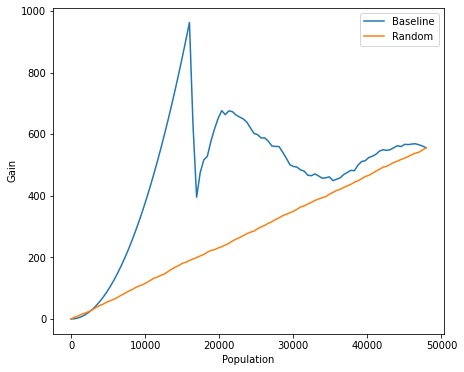

Baseline AUUC: 469.94    Random AUUC: 278.94


In [9]:
uplift_train.find_baseline_uplift()
uplift_train.calculate_auuc(original_uplift = True)

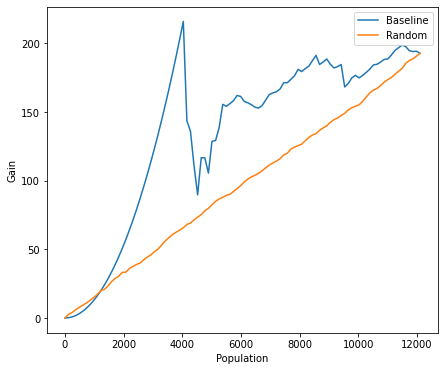

Baseline AUUC: 135.81    Random AUUC: 96.27


In [10]:
uplift_test.find_baseline_uplift()
uplift_test.calculate_auuc(original_uplift = True)